# **Data loading & Information -**







In [1]:
import io
import pandas as pd
import seaborn as sns 
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats as sts  
import datetime as dt
from collections import Counter
import os
import numpy as np

### Loading 4 csv files from google drive

In [2]:
from google.colab import files
uploaded = files.upload()

Saving flights_jan2015.csv to flights_jan2015.csv
Saving flights_jan2016.csv to flights_jan2016.csv
Saving flights_jan2017.csv to flights_jan2017.csv
Saving flights_jan2018.csv to flights_jan2018.csv


### Importing the loaded files to DataFrames

In [3]:
# Dataset is now stored in a Pandas Dataframe

df1 = pd.read_csv(io.BytesIO(uploaded['flights_jan2015.csv']))
df2 = pd.read_csv(io.BytesIO(uploaded['flights_jan2016.csv']))
df3 = pd.read_csv(io.BytesIO(uploaded['flights_jan2017.csv']))
df4 = pd.read_csv(io.BytesIO(uploaded['flights_jan2018.csv']))

In [4]:
# 2015 January data

df1.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 50
0,2015,1,1,15,4,2015-01-15,AA,19805,N4YTAA,362,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,MKE,"Milwaukee, WI",WI,55,Wisconsin,45,2032.0,32.0,32.0,1.0,2.0,2000-2059,13.0,2045.0,2236.0,5.0,2241.0,24.0,24.0,1.0,1.0,2200-2259,0.0,NaN,0.0,111.0,1.0,853.0,4,11.0,0.0,0.0,0.0,13.0,NaN
1,2015,1,1,16,5,2015-01-16,AA,19805,N502AA,362,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,MKE,"Milwaukee, WI",WI,55,Wisconsin,45,2044.0,44.0,44.0,1.0,2.0,2000-2059,12.0,2056.0,2252.0,8.0,2300.0,43.0,43.0,1.0,2.0,2200-2259,0.0,NaN,0.0,116.0,1.0,853.0,4,43.0,0.0,0.0,0.0,0.0,NaN
2,2015,1,1,17,6,2015-01-17,AA,19805,N467AA,362,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,MKE,"Milwaukee, WI",WI,55,Wisconsin,45,1955.0,-5.0,0.0,0.0,-1.0,2000-2059,15.0,2010.0,2157.0,7.0,2204.0,-13.0,0.0,0.0,-1.0,2200-2259,0.0,NaN,0.0,107.0,1.0,853.0,4,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,18,7,2015-01-18,AA,19805,N4XWAA,362,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,MKE,"Milwaukee, WI",WI,55,Wisconsin,45,1957.0,-3.0,0.0,0.0,-1.0,2000-2059,12.0,2009.0,2205.0,4.0,2209.0,-8.0,0.0,0.0,-1.0,2200-2259,0.0,NaN,0.0,116.0,1.0,853.0,4,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,19,1,2015-01-19,AA,19805,N479AA,362,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,MKE,"Milwaukee, WI",WI,55,Wisconsin,45,1956.0,-4.0,0.0,0.0,-1.0,2000-2059,12.0,2008.0,2208.0,8.0,2216.0,-1.0,0.0,0.0,-1.0,2200-2259,0.0,NaN,0.0,120.0,1.0,853.0,4,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 2016 January data

df2.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 50
0,2016,1,1,5,2,2016-01-05,AA,19805,N3EKAA,238,MIA,"Miami, FL",FL,12,Florida,33,DCA,"Washington, DC",VA,51,Virginia,38,1436.0,21.0,21.0,1.0,1.0,1400-1459,13.0,1449.0,1655.0,5.0,1700.0,15.0,15.0,1.0,1.0,1600-1659,0.0,NaN,0.0,126.0,1.0,919.0,4,15.0,0.0,0.0,0.0,0.0,NaN
1,2016,1,1,6,3,2016-01-06,AA,19805,N3KUAA,238,MIA,"Miami, FL",FL,12,Florida,33,DCA,"Washington, DC",VA,51,Virginia,38,1414.0,-1.0,0.0,0.0,-1.0,1400-1459,15.0,1429.0,1637.0,5.0,1642.0,-3.0,0.0,0.0,-1.0,1600-1659,0.0,NaN,0.0,128.0,1.0,919.0,4,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,7,4,2016-01-07,AA,19805,N3AVAA,238,MIA,"Miami, FL",FL,12,Florida,33,DCA,"Washington, DC",VA,51,Virginia,38,1441.0,26.0,26.0,1.0,1.0,1400-1459,9.0,1450.0,1653.0,16.0,1709.0,24.0,24.0,1.0,1.0,1600-1659,0.0,NaN,0.0,123.0,1.0,919.0,4,18.0,0.0,0.0,0.0,6.0,NaN
3,2016,1,1,8,5,2016-01-08,AA,19805,N3DSAA,238,MIA,"Miami, FL",FL,12,Florida,33,DCA,"Washington, DC",VA,51,Virginia,38,1446.0,31.0,31.0,1.0,2.0,1400-1459,28.0,1514.0,1710.0,27.0,1737.0,52.0,52.0,1.0,3.0,1600-1659,0.0,NaN,0.0,116.0,1.0,919.0,4,0.0,0.0,52.0,0.0,0.0,NaN
4,2016,1,1,9,6,2016-01-09,AA,19805,N3DFAA,238,MIA,"Miami, FL",FL,12,Florida,33,DCA,"Washington, DC",VA,51,Virginia,38,1414.0,-1.0,0.0,0.0,-1.0,1400-1459,19.0,1433.0,1634.0,18.0,1652.0,7.0,7.0,0.0,0.0,1600-1659,0.0,NaN,0.0,121.0,1.0,919.0,4,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# 2017 January data

df3.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 50
0,2017,1,1,16,1,2017-01-16,AA,19805,N3FYAA,2186,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,PSP,"Palm Springs, CA",CA,6,California,91,913.0,3.0,3.0,0.0,0.0,0900-0959,26.0,939.0,1019.0,5.0,1024.0,6.0,6.0,0.0,0.0,1000-1059,0.0,NaN,0.0,160.0,1.0,1126.0,5,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,1,1,17,2,2017-01-17,AA,19805,N3ASAA,2186,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,PSP,"Palm Springs, CA",CA,6,California,91,904.0,-6.0,0.0,0.0,-1.0,0900-0959,31.0,935.0,1007.0,4.0,1011.0,-7.0,0.0,0.0,-1.0,1000-1059,0.0,NaN,0.0,152.0,1.0,1126.0,5,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,1,1,18,3,2017-01-18,AA,19805,N3AKAA,2186,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,PSP,"Palm Springs, CA",CA,6,California,91,908.0,-2.0,0.0,0.0,-1.0,0900-0959,44.0,952.0,1023.0,5.0,1028.0,10.0,10.0,0.0,0.0,1000-1059,0.0,NaN,0.0,151.0,1.0,1126.0,5,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,1,1,19,4,2017-01-19,AA,19805,N3LSAA,2186,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,PSP,"Palm Springs, CA",CA,6,California,91,905.0,-5.0,0.0,0.0,-1.0,0900-0959,41.0,946.0,1039.0,8.0,1047.0,29.0,29.0,1.0,1.0,1000-1059,0.0,NaN,0.0,173.0,1.0,1126.0,5,0.0,0.0,29.0,0.0,0.0,NaN
4,2017,1,1,20,5,2017-01-20,AA,19805,N3NBAA,2186,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,PSP,"Palm Springs, CA",CA,6,California,91,903.0,-7.0,0.0,0.0,-1.0,0900-0959,20.0,923.0,1005.0,6.0,1011.0,-7.0,0.0,0.0,-1.0,1000-1059,0.0,NaN,0.0,162.0,1.0,1126.0,5,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# 2018 January data

df4.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 50
0,2018,1,1,14,7,2018-01-14,9E,20363,N279PQ,3468,SYR,"Syracuse, NY",NY,36,New York,22,DTW,"Detroit, MI",MI,26,Michigan,43,NaN,NaN,NaN,NaN,NaN,0001-0559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0700-0759,1.0,B,0.0,NaN,1.0,374.0,2,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,1,1,3,3,2018-01-03,9E,20363,N8928A,3468,SYR,"Syracuse, NY",NY,36,New York,22,LGA,"New York, NY",NY,36,New York,22,1348.0,-10.0,0.0,0.0,-1.0,1300-1359,22.0,1410.0,1452.0,14.0,1506.0,-13.0,0.0,0.0,-1.0,1500-1559,0.0,NaN,0.0,42.0,1.0,198.0,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,1,1,6,6,2018-01-06,9E,20363,N8986B,3468,SYR,"Syracuse, NY",NY,36,New York,22,LGA,"New York, NY",NY,36,New York,22,1410.0,12.0,12.0,0.0,0.0,1300-1359,41.0,1451.0,1536.0,7.0,1543.0,24.0,24.0,1.0,1.0,1500-1559,0.0,NaN,0.0,45.0,1.0,198.0,1,12.0,0.0,12.0,0.0,0.0,NaN
3,2018,1,1,7,7,2018-01-07,9E,20363,N8986B,3468,SYR,"Syracuse, NY",NY,36,New York,22,LGA,"New York, NY",NY,36,New York,22,1347.0,-11.0,0.0,0.0,-1.0,1300-1359,12.0,1359.0,1437.0,18.0,1455.0,-24.0,0.0,0.0,-2.0,1500-1559,0.0,NaN,0.0,38.0,1.0,198.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,1,1,8,1,2018-01-08,9E,20363,N8918B,3468,SYR,"Syracuse, NY",NY,36,New York,22,LGA,"New York, NY",NY,36,New York,22,1350.0,-8.0,0.0,0.0,-1.0,1300-1359,17.0,1407.0,1446.0,23.0,1509.0,-10.0,0.0,0.0,-1.0,1500-1559,0.0,NaN,0.0,39.0,1.0,198.0,1,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# We can see that all four dataframe have the exact same columns

### Concatenating all data into one DataFrame

In [9]:
merged_df = pd.concat([df1, df2, df3, df4], ignore_index = True)

In [10]:
merged_df

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 50
0,2015,1,1,15,4,2015-01-15,AA,19805,N4YTAA,362,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,MKE,"Milwaukee, WI",WI,55,Wisconsin,45,2032.0,32.0,32.0,1.0,2.0,2000-2059,13.0,2045.0,2236.0,5.0,2241.0,24.0,24.0,1.0,1.0,2200-2259,0.0,NaN,0.0,111.0,1.0,853.0,4,11.0,0.0,0.0,0.0,13.0,NaN
1,2015,1,1,16,5,2015-01-16,AA,19805,N502AA,362,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,MKE,"Milwaukee, WI",WI,55,Wisconsin,45,2044.0,44.0,44.0,1.0,2.0,2000-2059,12.0,2056.0,2252.0,8.0,2300.0,43.0,43.0,1.0,2.0,2200-2259,0.0,NaN,0.0,116.0,1.0,853.0,4,43.0,0.0,0.0,0.0,0.0,NaN
2,2015,1,1,17,6,2015-01-17,AA,19805,N467AA,362,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,MKE,"Milwaukee, WI",WI,55,Wisconsin,45,1955.0,-5.0,0.0,0.0,-1.0,2000-2059,15.0,2010.0,2157.0,7.0,2204.0,-13.0,0.0,0.0,-1.0,2200-2259,0.0,NaN,0.0,107.0,1.0,853.0,4,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,18,7,2015-01-18,AA,19805,N4XWAA,362,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,MKE,"Milwaukee, WI",WI,55,Wisconsin,45,1957.0,-3.0,0.0,0.0,-1.0,2000-2059,12.0,2009.0,2205.0,4.0,2209.0,-8.0,0.0,0.0,-1.0,2200-2259,0.0,NaN,0.0,116.0,1.0,853.0,4,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,19,1,2015-01-19,AA,19805,N479AA,362,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,MKE,"Milwaukee, WI",WI,55,Wisconsin,45,1956.0,-4.0,0.0,0.0,-1.0,2000-2059,12.0,2008.0,2208.0,8.0,2216.0,-1.0,0.0,0.0,-1.0,2200-2259,0.0,NaN,0.0,120.0,1.0,853.0,4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935925,2018,1,1,25,4,2018-01-25,AS,19930,N270AK,7,JFK,"New York, NY",NY,36,New York,22,SEA,"Seattle, WA",WA,53,Washington,93,705.0,-10.0,0.0,0.0,-1.0,0700-0759,24.0,729.0,1030.0,4.0,1034.0,-11.0,0.0,0.0,-1.0,1000-1059,0.0,NaN,0.0,361.0,1.0,2422.0,10,NaN,NaN,NaN,NaN,NaN,NaN
1935926,2018,1,1,25,4,2018-01-25,AS,19930,N587AS,8,SEA,"Seattle, WA",WA,53,Washington,93,EWR,"Newark, NJ",NJ,34,New Jersey,21,731.0,1.0,1.0,0.0,0.0,0700-0759,14.0,745.0,1523.0,32.0,1555.0,9.0,9.0,0.0,0.0,1500-1559,0.0,NaN,0.0,278.0,1.0,2402.0,10,NaN,NaN,NaN,NaN,NaN,NaN
1935927,2018,1,1,25,4,2018-01-25,AS,19930,N435AS,10,SEA,"Seattle, WA",WA,53,Washington,93,MCO,"Orlando, FL",FL,12,Florida,33,2110.0,-5.0,0.0,0.0,-1.0,2100-2159,11.0,2121.0,521.0,6.0,527.0,-20.0,0.0,0.0,-2.0,0001-0559,0.0,NaN,0.0,300.0,1.0,2554.0,11,NaN,NaN,NaN,NaN,NaN,NaN
1935928,2018,1,1,25,4,2018-01-25,AS,19930,N435AS,11,EWR,"Newark, NJ",NJ,34,New Jersey,21,SEA,"Seattle, WA",WA,53,Washington,93,1548.0,-17.0,0.0,0.0,-2.0,1600-1659,29.0,1617.0,1904.0,4.0,1908.0,-30.0,0.0,0.0,-2.0,1900-1959,0.0,NaN,0.0,347.0,1.0,2402.0,10,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935930 entries, 0 to 1935929
Data columns (total 51 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   YEAR                   int64  
 1   QUARTER                int64  
 2   MONTH                  int64  
 3   DAY_OF_MONTH           int64  
 4   DAY_OF_WEEK            int64  
 5   FL_DATE                object 
 6   OP_UNIQUE_CARRIER      object 
 7   OP_CARRIER_AIRLINE_ID  int64  
 8   TAIL_NUM               object 
 9   OP_CARRIER_FL_NUM      int64  
 10  ORIGIN                 object 
 11  ORIGIN_CITY_NAME       object 
 12  ORIGIN_STATE_ABR       object 
 13  ORIGIN_STATE_FIPS      int64  
 14  ORIGIN_STATE_NM        object 
 15  ORIGIN_WAC             int64  
 16  DEST                   object 
 17  DEST_CITY_NAME         object 
 18  DEST_STATE_ABR         object 
 19  DEST_STATE_FIPS        int64  
 20  DEST_STATE_NM          object 
 21  DEST_WAC               int64  
 22  DEP_TIME          

### Choosing columns for analysis 

In [12]:
# 29 out of 51 columns chosen for analysis

merged_df = merged_df[[
    'YEAR', 
    'DAY_OF_MONTH',
    'DAY_OF_WEEK',
    'FL_DATE',
    'OP_UNIQUE_CARRIER',
    'ORIGIN', 
    'ORIGIN_WAC',
    'DEST',
    'DEST_WAC',
    'DEP_TIME',
    'DEP_DELAY',
    'DEP_DEL15',
    'TAXI_OUT',
    'TAXI_IN',
    'WHEELS_OFF',
    'WHEELS_ON',
    'ARR_TIME',
    'ARR_DELAY',
    'ARR_DEL15',
    'CANCELLED',
    'CANCELLATION_CODE',
    'DIVERTED',
    'AIR_TIME',
    'DISTANCE',
    'CARRIER_DELAY',
    'WEATHER_DELAY',
    'NAS_DELAY',
    'SECURITY_DELAY',
    'LATE_AIRCRAFT_DELAY' ]] 

In [13]:
# new dataframe with 29 columns that are needed for the analysis 

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935930 entries, 0 to 1935929
Data columns (total 29 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   DAY_OF_MONTH         int64  
 2   DAY_OF_WEEK          int64  
 3   FL_DATE              object 
 4   OP_UNIQUE_CARRIER    object 
 5   ORIGIN               object 
 6   ORIGIN_WAC           int64  
 7   DEST                 object 
 8   DEST_WAC             int64  
 9   DEP_TIME             float64
 10  DEP_DELAY            float64
 11  DEP_DEL15            float64
 12  TAXI_OUT             float64
 13  TAXI_IN              float64
 14  WHEELS_OFF           float64
 15  WHEELS_ON            float64
 16  ARR_TIME             float64
 17  ARR_DELAY            float64
 18  ARR_DEL15            float64
 19  CANCELLED            float64
 20  CANCELLATION_CODE    object 
 21  DIVERTED             float64
 22  AIR_TIME             float64
 23  DISTANCE             float64
 24

# **Data Cleaning -**

### Displaying the missing values

In [14]:
merged_df.isna().sum()

YEAR                         0
DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
FL_DATE                      0
OP_UNIQUE_CARRIER            0
ORIGIN                       0
ORIGIN_WAC                   0
DEST                         0
DEST_WAC                     0
DEP_TIME                 48494
DEP_DELAY                48994
DEP_DEL15                48994
TAXI_OUT                 49312
TAXI_IN                  50984
WHEELS_OFF               49312
WHEELS_ON                50984
ARR_TIME                 50984
ARR_DELAY                54476
ARR_DEL15                54476
CANCELLED                    0
CANCELLATION_CODE      1886228
DIVERTED                     0
AIR_TIME                 54274
DISTANCE                     0
CARRIER_DELAY          1573638
WEATHER_DELAY          1573638
NAS_DELAY              1573638
SECURITY_DELAY         1573638
LATE_AIRCRAFT_DELAY    1573638
dtype: int64

### Since all the delay columns will be a major part of my analysis, and a major chunk of the data in these columns is missing. I will convert these missing values to 0.

In [15]:
values = {
    'DEP_DELAY': 0, 
    'DEP_DEL15': 0, 
    'ARR_DELAY': 0, 
    'ARR_DEL15': 0, 
    'CARRIER_DELAY': 0, 
    'WEATHER_DELAY': 0, 
    'NAS_DELAY': 0,
    'SECURITY_DELAY': 0,
    'LATE_AIRCRAFT_DELAY': 0 }

merged_df = merged_df.fillna(value = values)

### Replacing the missing values for Taxi in/out, Wheels on/off with the column mean values. 

In [16]:
TAXIOUT_mean = merged_df['TAXI_OUT'].mean()
TAXIIN_mean = merged_df['TAXI_IN'].mean()
WHEELSOFF_mean = merged_df['WHEELS_OFF'].mean()
WHEELSON_mean = merged_df['WHEELS_ON'].mean()

merged_df['TAXI_OUT'] = merged_df['TAXI_OUT'].fillna(TAXIOUT_mean)
merged_df['TAXI_IN'] = merged_df['TAXI_IN'].fillna(TAXIIN_mean)
merged_df['WHEELS_OFF'] = merged_df['WHEELS_OFF'].fillna(WHEELSOFF_mean)
merged_df['WHEELS_ON'] = merged_df['WHEELS_ON'].fillna(WHEELSON_mean)

### Removing the column Cancellation Code as 90% of the values are missing

In [17]:
merged_df = merged_df.drop(['CANCELLATION_CODE'], axis=1)

### Now only left with Arrival, Delay and Air - Time columns. It does not make sence to relace the the missing values with 0. Thus, I will just drop them. 

In [18]:
merged_df = merged_df.dropna()
merged_df = merged_df.reset_index(drop = True)

## HeatMap to check if there are any more missing values.

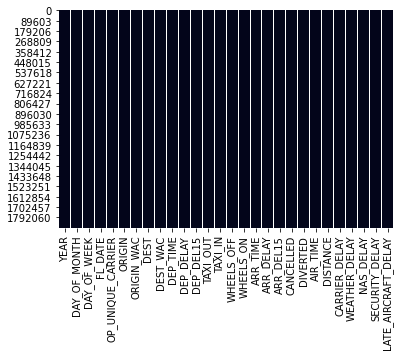

In [19]:
sns.heatmap(merged_df.isnull(), cbar = False)

## Final clean dataframe that I will use for my analysis 




In [20]:
# From 1,935,930 entries, now down to 1,881,656 entries

merged_df.shape

(1881656, 28)

## Saving the clean dataset to use for my analysis


In [21]:
merged_df.to_csv('flights_jan2015to2018.csv', index = False)

# **Exploratory Data Analysis -**

In [22]:
# Dataset is now stored in a Pandas Dataframe

flights = pd.read_csv("flights_jan2015to2018.csv")
flights

,YEAR,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_WAC,DEST,DEST_WAC,DEP_TIME,DEP_DELAY,DEP_DEL15,TAXI_OUT,TAXI_IN,WHEELS_OFF,WHEELS_ON,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2015,15,4,2015-01-15,AA,DFW,74,MKE,45,2032.0,32.0,1.0,13.0,5.0,2045.0,2236.0,2241.0,24.0,1.0,0.0,0.0,111.0,853.0,11.0,0.0,0.0,0.0,13.0
1,2015,16,5,2015-01-16,AA,DFW,74,MKE,45,2044.0,44.0,1.0,12.0,8.0,2056.0,2252.0,2300.0,43.0,1.0,0.0,0.0,116.0,853.0,43.0,0.0,0.0,0.0,0.0
2,2015,17,6,2015-01-17,AA,DFW,74,MKE,45,1955.0,-5.0,0.0,15.0,7.0,2010.0,2157.0,2204.0,-13.0,0.0,0.0,0.0,107.0,853.0,0.0,0.0,0.0,0.0,0.0
3,2015,18,7,2015-01-18,AA,DFW,74,MKE,45,1957.0,-3.0,0.0,12.0,4.0,2009.0,2205.0,2209.0,-8.0,0.0,0.0,0.0,116.0,853.0,0.0,0.0,0.0,0.0,0.0
4,2015,19,1,2015-01-19,AA,DFW,74,MKE,45,1956.0,-4.0,0.0,12.0,8.0,2008.0,2208.0,2216.0,-1.0,0.0,0.0,0.0,120.0,853.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881651,2018,25,4,2018-01-25,AS,JFK,22,SEA,93,705.0,-10.0,0.0,24.0,4.0,729.0,1030.0,1034.0,-11.0,0.0,0.0,0.0,361.0,2422.0,0.0,0.0,0.0,0.0,0.0
1881652,2018,25,4,2018-01-25,AS,SEA,93,EWR,21,731.0,1.0,0.0,14.0,32.0,745.0,1523.0,1555.0,9.0,0.0,0.0,0.0,278.0,2402.0,0.0,0.0,0.0,0.0,0.0
1881653,2018,25,4,2018-01-25,AS,SEA,93,MCO,33,2110.0,-5.0,0.0,11.0,6.0,2121.0,521.0,527.0,-20.0,0.0,0.0,0.0,300.0,2554.0,0.0,0.0,0.0,0.0,0.0
1881654,2018,25,4,2018-01-25,AS,EWR,21,SEA,93,1548.0,-17.0,0.0,29.0,4.0,1617.0,1904.0,1908.0,-30.0,0.0,0.0,0.0,347.0,2402.0,0.0,0.0,0.0,0.0,0.0


## 1. Basic statistics of Flight Count per Year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


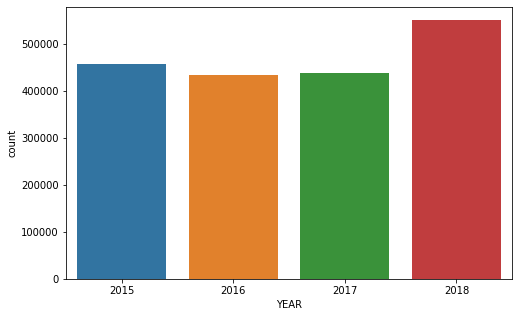

In [23]:
# calculating the number of flights each year

fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(flights['YEAR'])
plt.savefig('CountFlightsperYear.png')

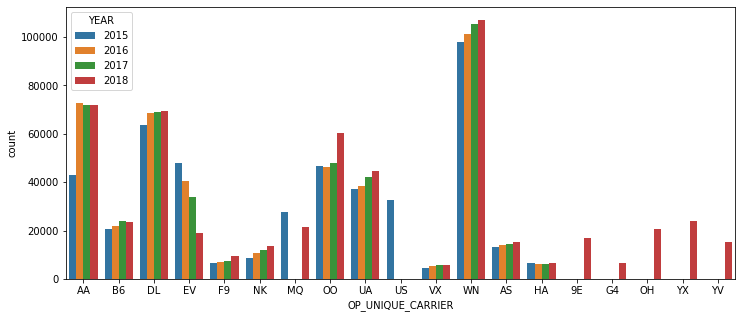

In [24]:
# calculating the number of flights each year as per the airlines

plt.figure(figsize=(12,5))
sns.countplot(x = "OP_UNIQUE_CARRIER", hue = "YEAR", data = flights)
plt.title("")
plt.show()

## 2. Plotting Airlines as per Departure Delay



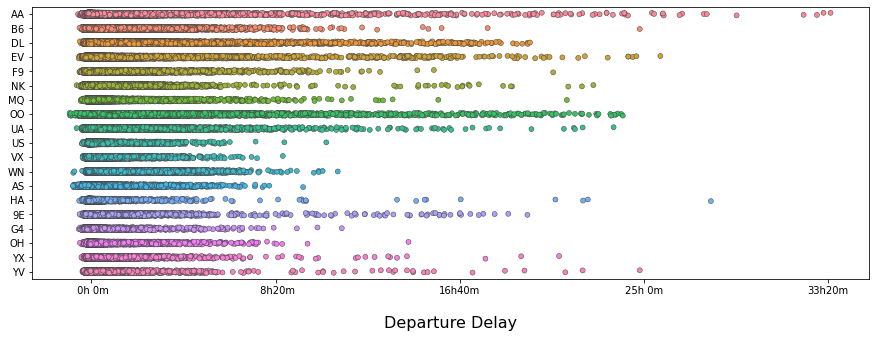

In [25]:
# Dispersion of data delays that were measured in January 2015 - 2018 early dep

fig,ax2 = plt.subplots(figsize=(15,5))
ax2 = sns.stripplot(y="OP_UNIQUE_CARRIER", x="DEP_DELAY", size = 5, data=flights, linewidth = 0.5,  jitter=True)
ax2.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)]) for x in ax2.get_xticks()])
plt.xlabel('Departure Delay', fontsize=16, labelpad=20)
ax2.yaxis.label.set_visible(False)
plt.savefig('DepartureDelay.png')

In [26]:
# groupby the departure delay data by airline 
data = flights.groupby("OP_UNIQUE_CARRIER")["DEP_DELAY"].sum()
data

OP_UNIQUE_CARRIER
9E     203883.0
AA    1996015.0
AS      90084.0
B6    1333018.0
DL    2482093.0
EV    1565864.0
F9     442736.0
G4      69576.0
HA      25388.0
MQ     629976.0
NK     487219.0
OH     282106.0
OO    2646373.0
UA    1705077.0
US     168074.0
VX     215843.0
WN    3608990.0
YV     134879.0
YX     172411.0
Name: DEP_DELAY, dtype: float64

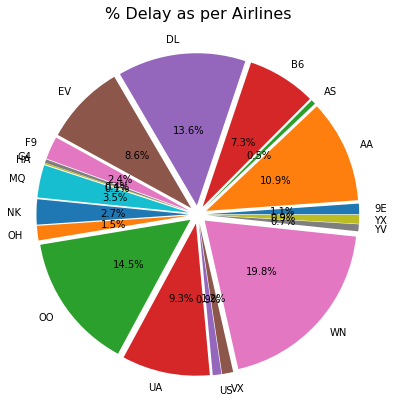

In [27]:
pie, ax = plt.subplots(figsize=[10,7])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0.06]*19, labels=labels, pctdistance=0.5)
plt.title("% Delay as per Airlines", fontsize=16);
pie.savefig("%DelayPerAirlines.png")

## 3. Correlations through Regression plots

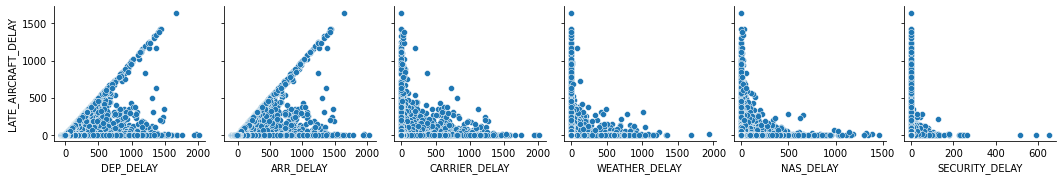

In [28]:
# Here we can see the correlation between Late aircraft delay and reasons for the delays -
# The graphs for Departure and Arrivial delays suggests that they are directly proportional to causing late aircraft. 
  
sns.pairplot(
    flights,
    x_vars=["DEP_DELAY", "ARR_DELAY", "CARRIER_DELAY", "WEATHER_DELAY",	"NAS_DELAY",	"SECURITY_DELAY"],
    y_vars=["LATE_AIRCRAFT_DELAY"],
)


Text(0.5, 1.0, 'Distance VS Air Time')

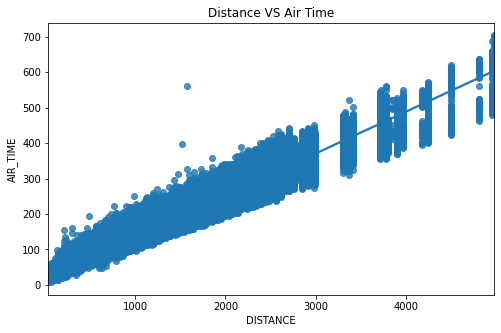

In [29]:
# strong correlation between distance and air time 

fig, ax = plt.subplots(figsize = (8,5))
ax = sns.regplot(x = "DISTANCE", y = "AIR_TIME", data = flights)
#ax = sns.scatterplot(x = "DEP_TIME", y = "ARR_TIME", data = flights)
plt.title("Distance VS Air Time")

Text(0.5, 1.0, 'Departure Time VS Arrival Time')

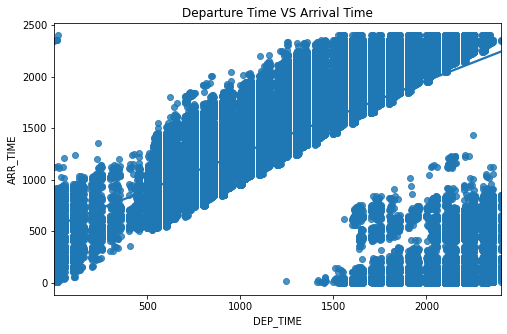

In [30]:
# There is a correlation between departure and arrival time, but there is too much data thus needs further exploration

fig, ax = plt.subplots(figsize = (8,5))
ax = sns.regplot(x = "DEP_TIME", y = "ARR_TIME", data = flights)
plt.title("Departure Time VS Arrival Time")

## 4. Departure VS Arrival Delay



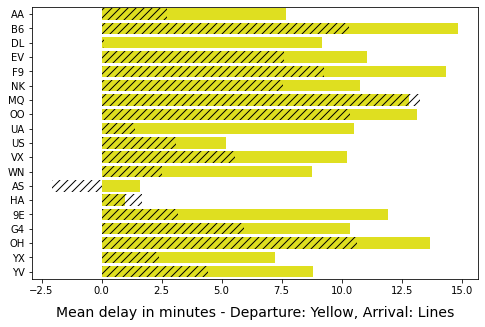

In [31]:
matplotlib.rcParams['hatch.linewidth'] = 1.0  
fig = plt.figure(1, figsize=(8,5))
ax = sns.barplot(x="DEP_DELAY", y="OP_UNIQUE_CARRIER", data=flights, color="yellow", ci=None)
ax = sns.barplot(x="ARR_DELAY", y="OP_UNIQUE_CARRIER", data=flights, color="r", hatch = '///',
                 alpha = 0.0, ci=None)
ax.yaxis.label.set_visible(False)
plt.xlabel('Mean delay in minutes - Departure: Yellow, Arrival: Lines',
           fontsize=14, labelpad=10);
plt.savefig('DepartureVSArrivalDelay.png')

## 5. Discovering possible variables impacting flight delays

### Average of Flight Delays by Day of Month

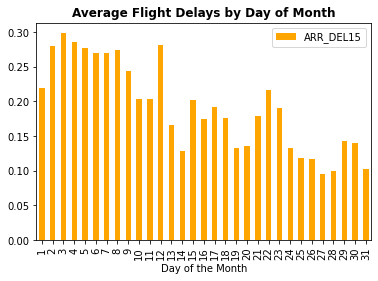

In [32]:
# Grouping average number of delayed flights per day of month with more than 15 min record
g = flights[['ARR_DEL15', 'DAY_OF_MONTH']].groupby('DAY_OF_MONTH').mean()

# plot average delays by day of month
g.plot(kind='bar', color = "orange")
plt.title('Average Flight Delays by Day of Month', fontweight="bold")
plt.xlabel('Day of the Month');
plt.savefig('delays_by_day.png')


### Count of delayed flights per carrier

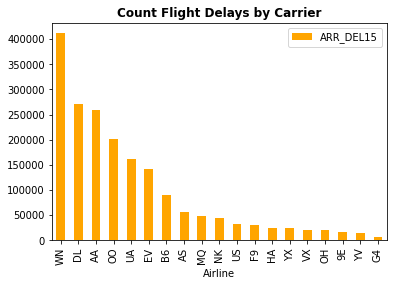

In [33]:
# Count of delayed flights per carrier and filter based on carriers with more than 15 min record
g = flights[['ARR_DEL15', 'OP_UNIQUE_CARRIER']] \
    .groupby('OP_UNIQUE_CARRIER').filter(lambda x: len(x)>15)
g1 = g.groupby('OP_UNIQUE_CARRIER').count()

# display carriers by delay
g1.sort_values(['ARR_DEL15'], ascending=False).plot(kind='bar', color = "orange")
plt.title('Count Flight Delays by Carrier', fontweight="bold")
plt.xlabel('Airline');
plt.savefig('delays_by_carrier.png')

### Average of Flight Delays by Origin Airport

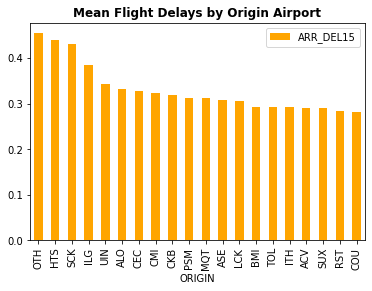

In [34]:
# Compute average number of delayed flights per origin airport based on airports with more than 15 min record
g = flights[['ARR_DEL15', 'ORIGIN']].groupby('ORIGIN').filter(lambda x: len(x)>15)
g1 = g.groupby('ORIGIN').mean()

# display top 50 origin airports by delay
g1.sort_values(['ARR_DEL15'], ascending=False)[:20].plot(kind='bar', color="orange")
plt.title('Mean Flight Delays by Origin Airport', fontweight="bold")
plt.savefig('delays_by_origin.png')

### Average of Flight Delays by Destination Airport

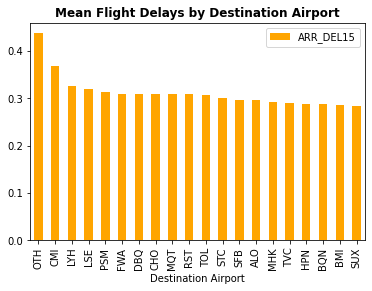

In [35]:
# Compute average number of delayed flights per destination airport based on airports with more than 15 min record
g = flights[['ARR_DEL15', 'DEST']].groupby('DEST').filter(lambda x: len(x)>15)
g1 = g.groupby('DEST').mean()

# display top 50 origin airports by delay
g1.sort_values(['ARR_DEL15'], ascending=False)[:20].plot(kind='bar', color="orange")
plt.title('Mean Flight Delays by Destination Airport', fontweight="bold")
plt.xlabel('Destination Airport');
plt.savefig('delays_by_destination.png')

## 6. Calculating the top 10 airports 

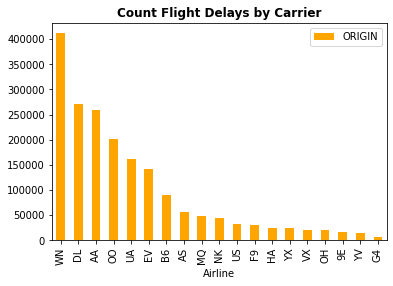

In [36]:
# Count of delayed flights per carrier and filter based on carriers with more than 15 min record
g = flights[['ORIGIN', 'OP_UNIQUE_CARRIER']] \
    .groupby('OP_UNIQUE_CARRIER').filter(lambda x: len(x)>15)
g1 = g.groupby('OP_UNIQUE_CARRIER').count()

# display carriers by delay
g1.sort_values(['ORIGIN'], ascending=False).plot(kind='bar', color = "orange")
plt.title('Count Flight Delays by Carrier', fontweight="bold")
plt.xlabel('Airline');
#plt.savefig('delays_by_carrier.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


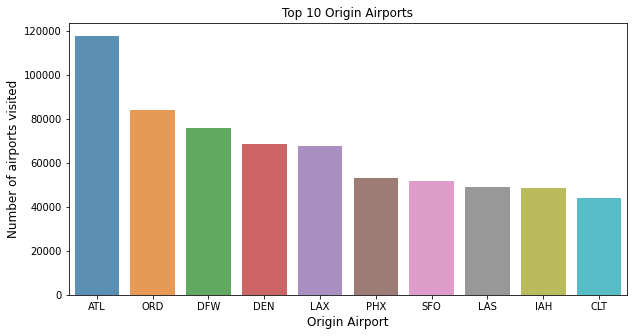

In [37]:
# Plotting the top 10 airports with the highest Origin flight count

origin_count  = flights['ORIGIN'].value_counts()
origin_count = origin_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(origin_count.index, origin_count.values, alpha=0.8)
plt.title('Top 10 Origin Airports')
plt.ylabel('Number of airports visited', fontsize=12)
plt.xlabel('Origin Airport', fontsize=12)
plt.show()

# **Creating Random Sample for Initial ML Analysis -**

https://www.geeksforgeeks.org/divide-a-pandas-dataframe-randomly-in-a-given-ratio/

In [57]:
# Creating a dataframe with 50%
# values of original dataframe

part_50 = merged_df.sample(frac = 0.5, replace=True, random_state=1)
part_50 = part_50.reset_index(drop=True)

print("\n50% of the given DataFrame:")
print(part_50)



50% of the given DataFrame:
        YEAR  DAY_OF_MONTH  ...  SECURITY_DELAY LATE_AIRCRAFT_DELAY
0       2015            22  ...             0.0                 0.0
1       2016            22  ...             0.0                 0.0
2       2016            27  ...             0.0                 4.0
3       2018            19  ...             0.0                 0.0
4       2016            21  ...             0.0                 0.0
...      ...           ...  ...             ...                 ...
940823  2018            23  ...             0.0                 0.0
940824  2017             9  ...             0.0                53.0
940825  2018            27  ...             0.0                 0.0
940826  2015            25  ...             0.0                 0.0
940827  2016            18  ...             0.0                 0.0

[940828 rows x 28 columns]


In [58]:
part_50

,YEAR,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_WAC,DEST,DEST_WAC,DEP_TIME,DEP_DELAY,DEP_DEL15,TAXI_OUT,TAXI_IN,WHEELS_OFF,WHEELS_ON,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2015,22,4,2015-01-22,B6,IAD,38,BOS,13,1828.0,-7.0,0.0,13.0,5.0,1841.0,1941.0,1946.0,-15.0,0.0,0.0,0.0,60.0,413.0,0.0,0.0,0.0,0.0,0.0
1,2016,22,5,2016-01-22,DL,MSP,63,GEG,93,2027.0,17.0,1.0,12.0,4.0,2039.0,2123.0,2127.0,0.0,0.0,0.0,0.0,164.0,1175.0,0.0,0.0,0.0,0.0,0.0
2,2016,27,3,2016-01-27,AA,BOS,13,DCA,38,1819.0,79.0,1.0,16.0,3.0,1835.0,1953.0,1956.0,71.0,1.0,0.0,0.0,78.0,399.0,67.0,0.0,0.0,0.0,4.0
3,2018,19,5,2018-01-19,AA,CLT,36,MSP,63,1304.0,-7.0,0.0,15.0,6.0,1319.0,1432.0,1438.0,-23.0,0.0,0.0,0.0,133.0,930.0,0.0,0.0,0.0,0.0,0.0
4,2016,21,4,2016-01-21,DL,JFK,22,LAS,85,1707.0,-3.0,0.0,24.0,5.0,1731.0,1929.0,1934.0,-40.0,0.0,0.0,0.0,298.0,2248.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940823,2018,23,2,2018-01-23,OO,SFO,91,ACV,91,1428.0,-7.0,0.0,16.0,5.0,1444.0,1524.0,1529.0,-25.0,0.0,0.0,0.0,40.0,250.0,0.0,0.0,0.0,0.0,0.0
940824,2017,9,1,2017-01-09,B6,SFO,91,JFK,22,1651.0,56.0,1.0,39.0,6.0,1730.0,108.0,114.0,53.0,1.0,0.0,0.0,278.0,2586.0,0.0,0.0,0.0,0.0,53.0
940825,2018,27,6,2018-01-27,AA,DFW,74,LGA,22,1432.0,-3.0,0.0,18.0,4.0,1450.0,1836.0,1840.0,-16.0,0.0,0.0,0.0,166.0,1389.0,0.0,0.0,0.0,0.0,0.0
940826,2015,25,7,2015-01-25,OO,LAX,91,BOI,83,1830.0,-5.0,0.0,18.0,4.0,1848.0,2120.0,2124.0,-14.0,0.0,0.0,0.0,92.0,674.0,0.0,0.0,0.0,0.0,0.0


In [59]:
part_50.to_csv('random_sample.csv', index = False)